## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 107.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 5.0 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2025.7.1 requires numpy>=1.26, but you have n

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings("ignore")

## Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/drive')
OFLCData=pd.read_csv("/drive/MyDrive/EasyVisa.csv")

Mounted at /drive


## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [ ]:
OFLCData.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified


In [ ]:
# last 5 rows of the data set
OFLCData.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.570,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.790,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.850,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.770,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.910,Year,Y,Certified


#### Understand the shape of the dataset

In [ ]:
OFLCData.shape

(25480, 12)

* the total rows in the data set is 25,480 with 12 columns.

#### Check the data types of the columns for the dataset

In [ ]:
OFLCData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


** Observation**
* there are 25480 records in the data set and all are not null
* only 2 columns are integer and one as float all others are objects
* no null values, this can be verified using isna() method.

In [ ]:
OFLCData.isna().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


**Observations**
* all columns have not null values.
* Number of unique values in the data set shows caseid as 25480.
* we can drop case_id column as because it does not help in prediction.

In [ ]:
# Summary of Employee data only with employee related columns
EmpData = OFLCData[['continent','education_of_employee','has_job_experience','requires_job_training','unit_of_wage','full_time_position','case_status']]
EmpData.describe().T

,count,unique,top,freq
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


** Observations **
* bachelors from Asia are the top in the Visa application.
* more than 50% of applicants have prior job experience.
* most of the applicants are full time employees.

In [ ]:
# list of all categorical variables
dfcopy = OFLCData.select_dtypes(include=['object'])
cat_col = dfcopy.columns

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(dfcopy[column].value_counts(normalize=True))
    print("-" * 50)

case_id
EZYV25480   0.000
EZYV01      0.000
EZYV02      0.000
EZYV03      0.000
EZYV04      0.000
             ... 
EZYV13      0.000
EZYV12      0.000
EZYV11      0.000
EZYV10      0.000
EZYV09      0.000
Name: proportion, Length: 25480, dtype: float64
--------------------------------------------------
continent
Asia            0.662
Europe          0.146
North America   0.129
South America   0.033
Africa          0.022
Oceania         0.008
Name: proportion, dtype: float64
--------------------------------------------------
education_of_employee
Bachelor's    0.402
Master's      0.378
High School   0.134
Doctorate     0.086
Name: proportion, dtype: float64
--------------------------------------------------
has_job_experience
Y   0.581
N   0.419
Name: proportion, dtype: float64
--------------------------------------------------
requires_job_training
N   0.884
Y   0.116
Name: proportion, dtype: float64
--------------------------------------------------
region_of_employment
Northeast   0

In [ ]:
# case_id is unique for each candidate and might not add value to modeling
#dfcopy.drop(["case_id"], axis=1)
dfcopy.describe().T

,count,unique,top,freq
case_id,25480,25480,EZYV25480,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

#### Fixing the negative values in number of employees columns

In [ ]:
# remove the 33 rows as those are data error which might affect model building
OFLCData = OFLCData[OFLCData['no_of_employees'] >= 0].copy()
OFLCData.count()

,0
case_id,25447
continent,25447
education_of_employee,25447
has_job_experience,25447
requires_job_training,25447
no_of_employees,25447
yr_of_estab,25447
region_of_employment,25447
prevailing_wage,25447
unit_of_wage,25447


* there are 33 rows with negative number of employee and we can remove those. the original data set has been updated by removing the 33 records so we have total 25447 records for model building.

#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
dfcopy.nunique()

,0
case_id,25480
continent,6
education_of_employee,4
has_job_experience,2
requires_job_training,2
region_of_employment,5
unit_of_wage,4
full_time_position,2
case_status,2


** Observation **
* All the data unique

### Univariate Analysis

In [ ]:
# drop case_id region of employment prevailing_wage column as those doesn't ontribute to visa approval prediction.
dfcopy = OFLCData.copy()
dfcopy = dfcopy.drop(["case_id"], axis=1)

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on education of employee

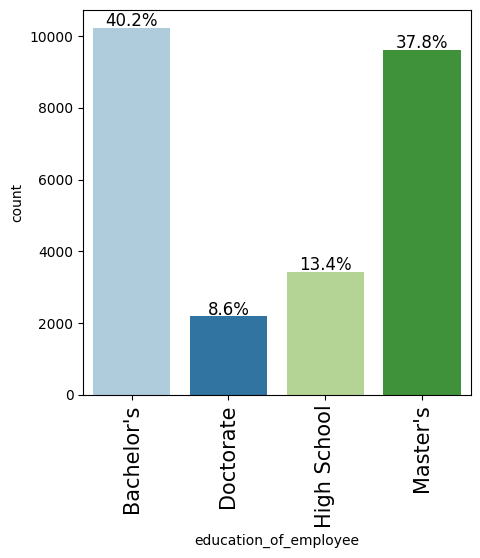

In [ ]:
barplot = labeled_barplot(dfcopy, "education_of_employee", perc=True)

* Most of the Visa applicants are having a bachelors and Masters degree.

#### Observations on region of employment

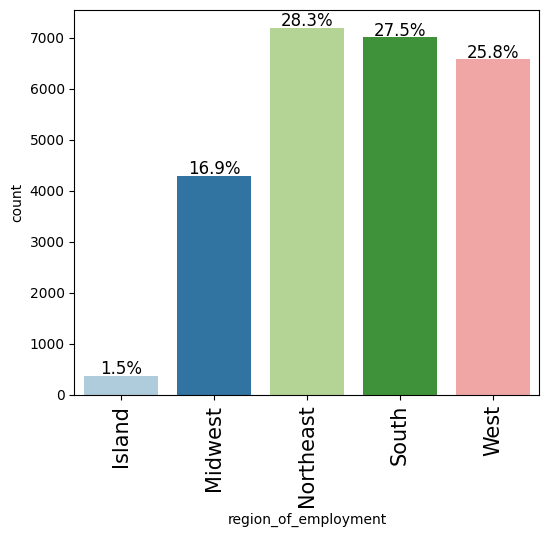

In [ ]:
barplot1 = labeled_barplot(OFLCData, "region_of_employment", perc=True)

* most of the employment happens around Northeash south and west however region_of_employment can not be taken as a feature/ column which will contribute in predicting an employee's visa approval , so this column has been removed from the dfcopy.

#### Observations on job experience

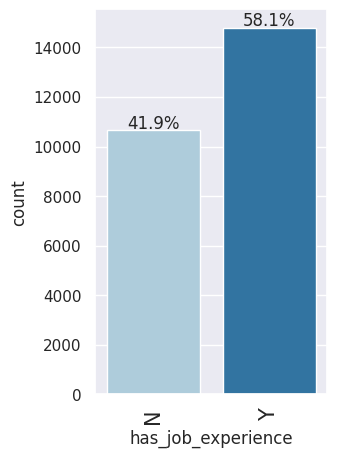

In [ ]:
barplot2 = labeled_barplot(dfcopy, "has_job_experience", perc=True)


** Observation **
* more number of applicant have prior job experience.

#### Observations on case status

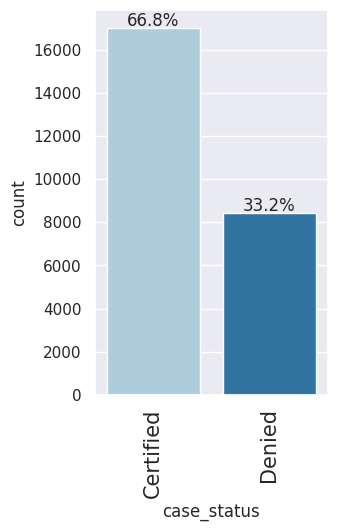

In [ ]:
barplot3 = labeled_barplot(dfcopy, "case_status", perc=True)

** Observation **
* around 66.8% application have approved visa   

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

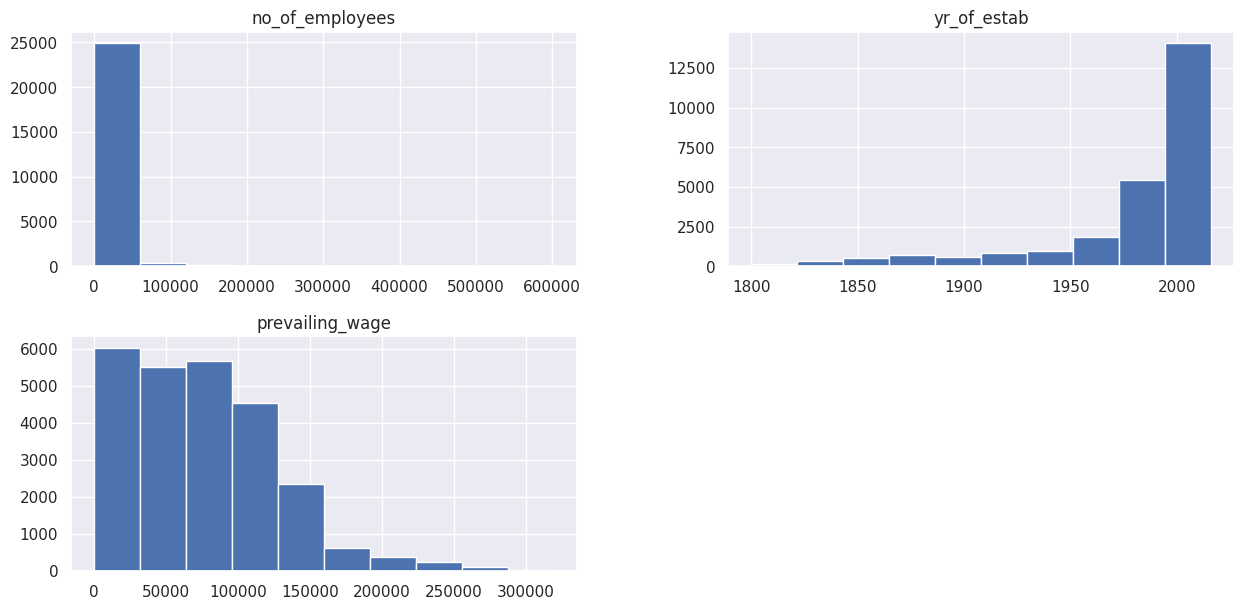

In [ ]:
sns.set(rc={'figure.figsize':(15,7)})
OFLCData.hist()
plt.show()


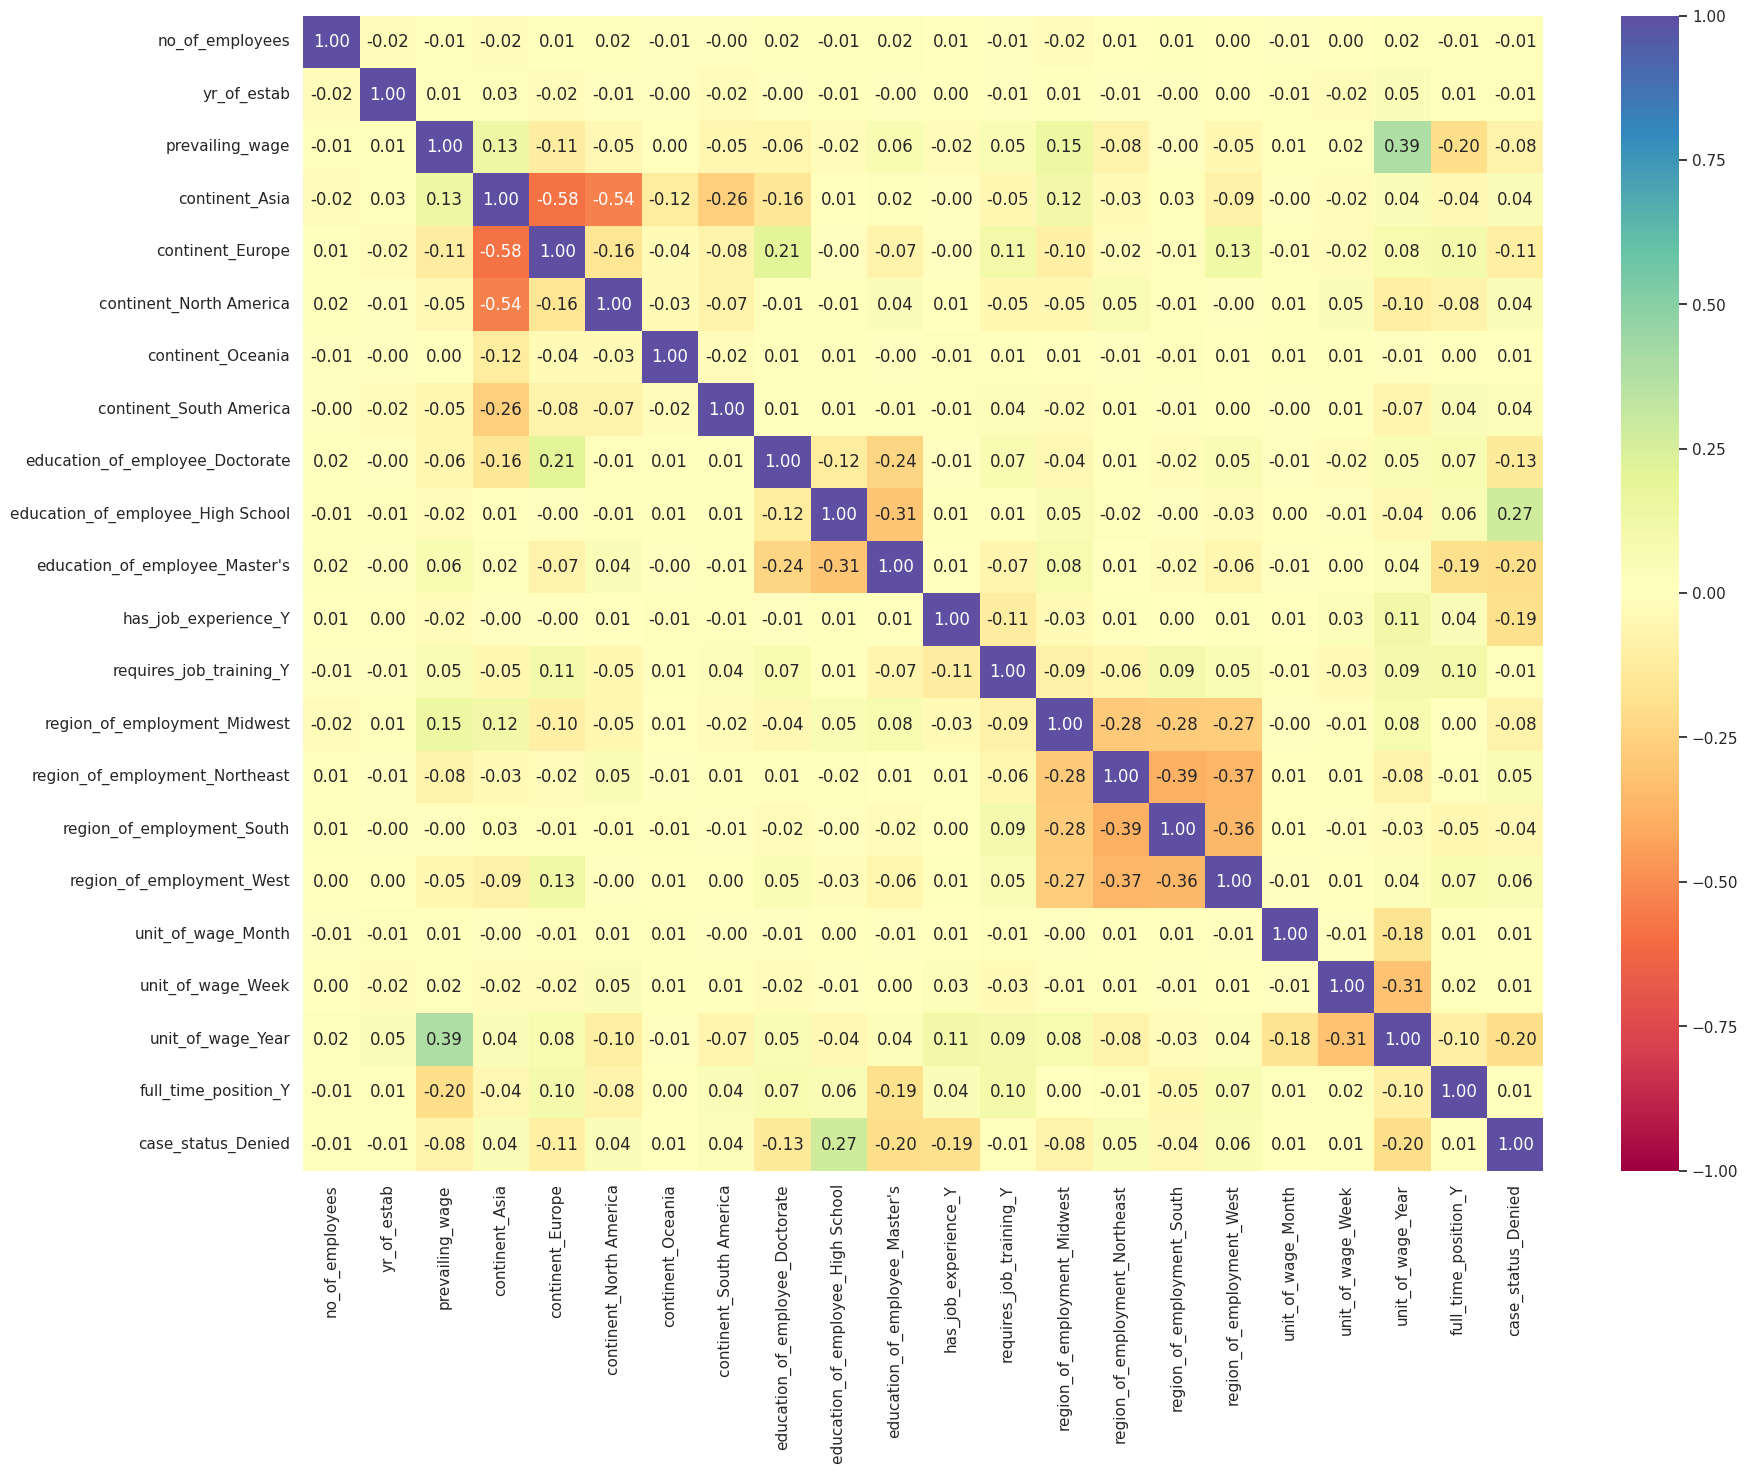

In [ ]:
#Heat map
#one hot encoding for categorical variables
df_cat = OFLCData.select_dtypes(include=['object']).copy()
df_numeric = OFLCData.select_dtypes(include=np.number).copy()

# Drop 'case_id' from categorical data as it's not needed for correlation
df_cat = df_cat.drop(["case_id"], axis=1)

# Perform one-hot encoding on the categorical columns
df_cat_encoded = pd.get_dummies(df_cat, columns=df_cat.columns, drop_first=True)

# Concatenate the numerical and encoded categorical dataframes
df_combined = pd.concat([df_numeric, df_cat_encoded], axis=1)

plt.figure(figsize=(20, 15))
# Calculate and plot the heatmap for the combined dataframe
sns.heatmap(df_combined.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

** Observations**
* Applications with yearly package (salary) is strongly coorelated to prevailing wage.
* we also observed prevailing ware is positively corelated to applicats with Master degree.
* Employees from Europe continent has been migrated and with Doctorate degree has been granted visa from America so europe is strongly coorelated to education as doctorate.
* ther are some negative coorelation values around region of employment those   should be removed for good results.
* Visa deniel also strongly related to high school education.



In [ ]:
def stacked_barplot(dfcopy, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = dfcopy[predictor].nunique()
    sorter = dfcopy[target].value_counts().index[-1]
    tab1 = pd.crosstab(dfcopy[predictor], dfcopy[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(dfcopy[predictor], dfcopy[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Does higher education increase the chances of visa certification for well-paid jobs abroad?

case_status            Certified  Denied    All
education_of_employee                          
All                        17001    8446  25447
Bachelor's                  6362    3858  10220
High School                 1164    2252   3416
Master's                    7565    2057   9622
Doctorate                   1910     279   2189
------------------------------------------------------------------------------------------------------------------------


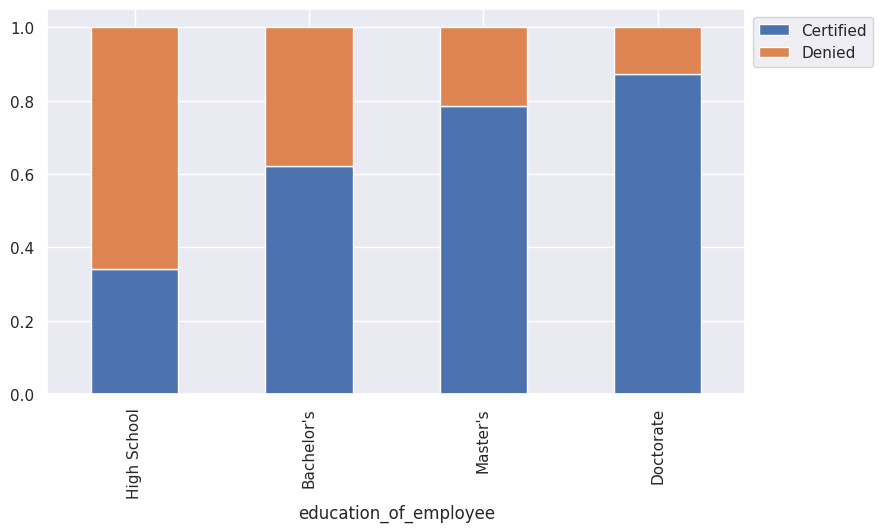

In [ ]:
stacked_barplot(dfcopy, "education_of_employee", "case_status")
#sns.countplot(data=OFLCData, x="education_of_employee", hue="case_status")

* Higher Education of an employee shows a higher chance of getting visa certified. Most doctorate employees are visa certified and high school students are denied.

#### How does visa status vary across different continents?

case_status    Certified  Denied    All
continent                              
All                17001    8446  25447
Asia               11001    5839  16840
North America       2037    1250   3287
Europe              2953     774   3727
South America        492     359    851
Africa               396     154    550
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


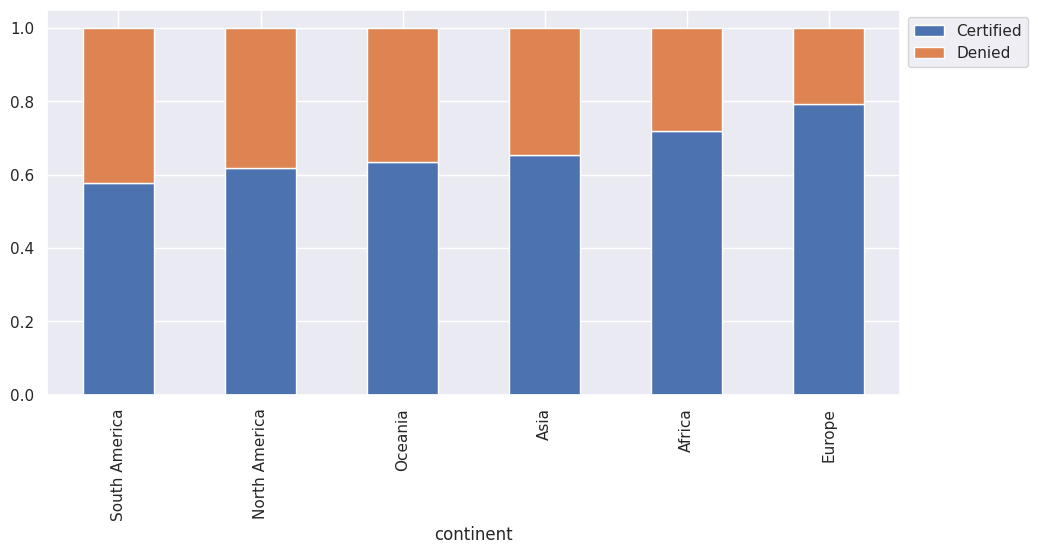

In [ ]:
stacked_barplot(dfcopy, "continent", "case_status")

* among all the continents we see Africa and Europe people have certified

#### Does having prior work experience influence the chances of visa certification for career opportunities abroad?

case_status         Certified  Denied    All
has_job_experience                          
All                     17001    8446  25447
N                        5986    4675  10661
Y                       11015    3771  14786
------------------------------------------------------------------------------------------------------------------------


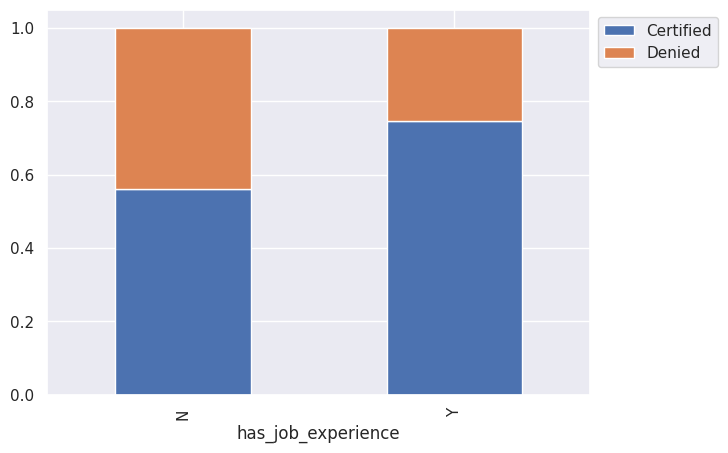

In [ ]:
stacked_barplot(dfcopy, "has_job_experience", "case_status")

* Prior experience also gives a higher chance to get certified visa.

#### Is the prevailing wage consistent across all regions of the US?

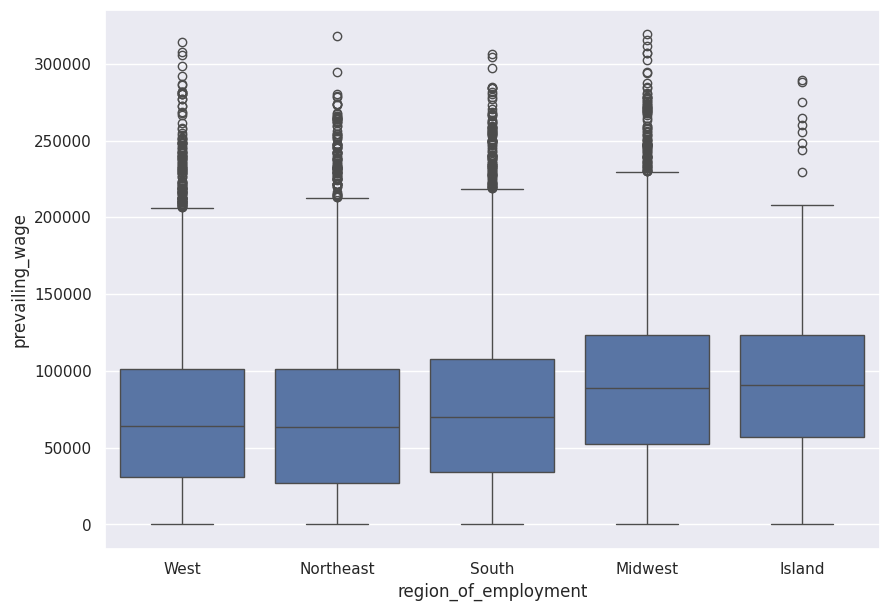

In [ ]:
#box plot for prevailing wage with north and south america  ( HERE I HAVE USED THE ORIGINAL DATA SET BECAUSE DFDATA SET DOESN'T HAVE THE COLUMN REGION OF EMPLOYMENT)
plt.figure(figsize=(10, 7))
sns.boxplot(data=OFLCData, x="region_of_employment", y="prevailing_wage")
plt.show()

* Midwest and Island have little higher prevailing wages than other regions of US so its not consistent across the regions of US.

#### Does visa status vary with changes in the prevailing wage set to protect both local talent and foreign workers?

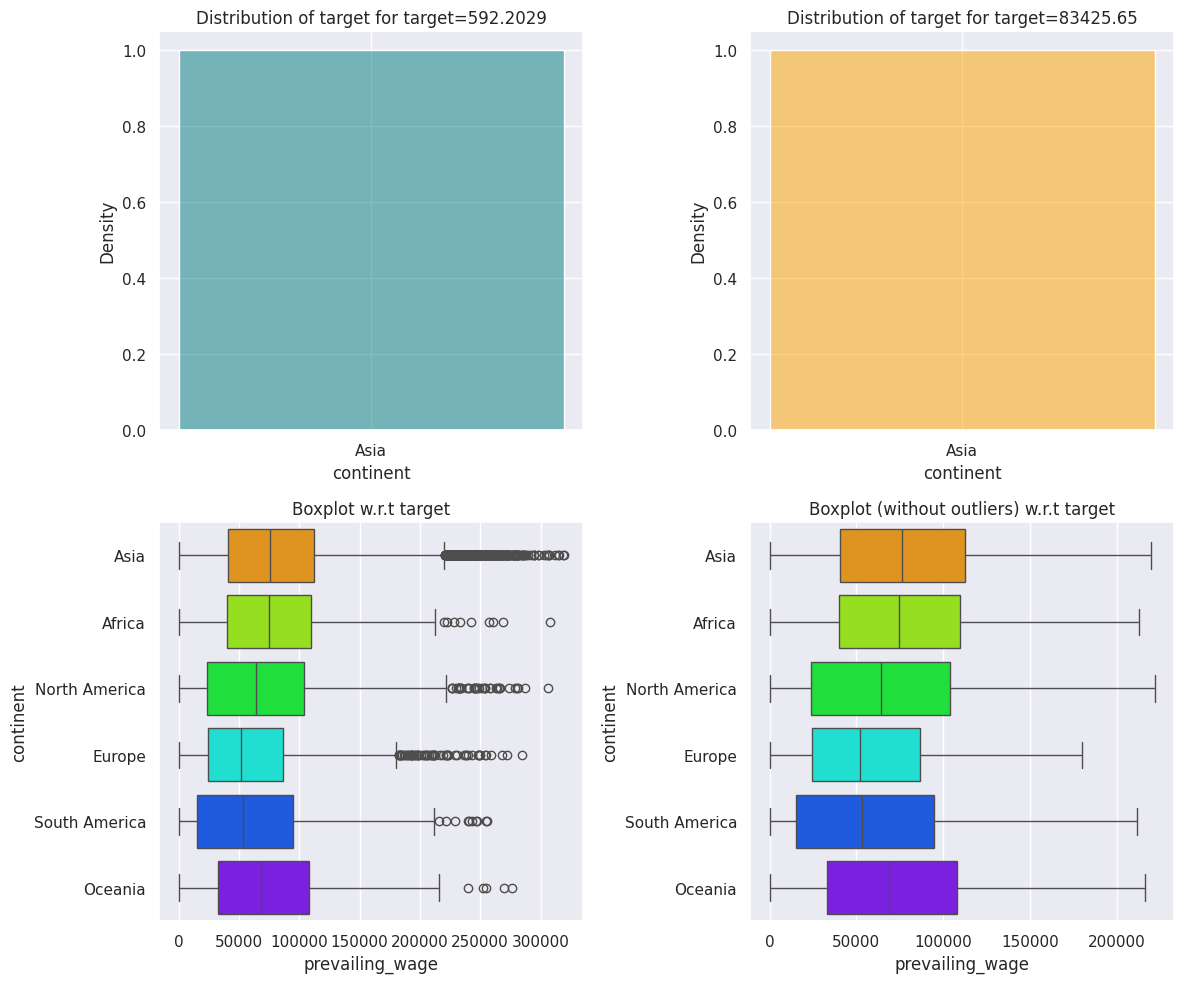

In [ ]:
distribution_plot_wrt_target(OFLCData,"continent","prevailing_wage")

* Prevailing wages does vary with continents and the density is more on Asian's applicant. May be because the number of asians applicant is the highest.

#### Does the unit of prevailing wage (Hourly, Weekly, etc.) have any impact on the likelihood of visa application certification?

case_status   Certified  Denied    All
unit_of_wage                          
All               17001    8446  25447
Year              16030    6903  22933
Hour                747    1406   2153
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


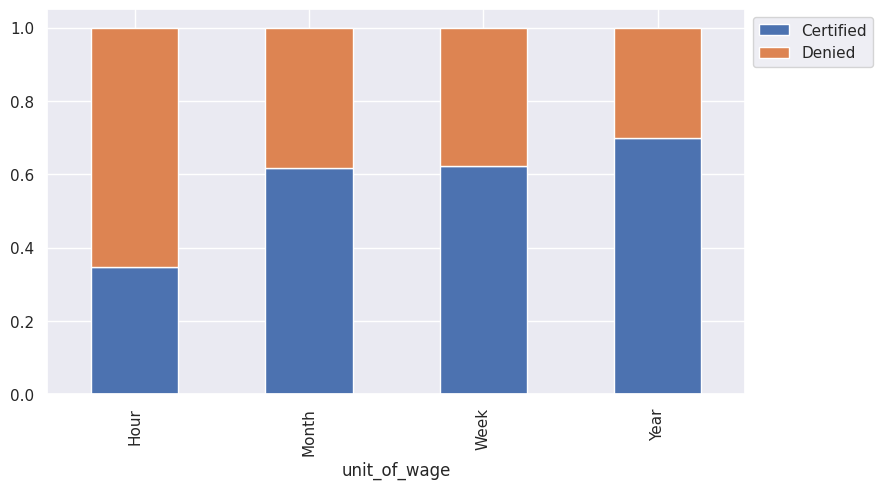

In [ ]:
stacked_barplot(dfcopy, "unit_of_wage", "case_status")

* This graph shows full time employees have higher chance to get certified visa than hourly or contract workers.Employees with yearly package income have higher chance of getting approved visa.

## Data Pre-processing

### Outlier Check

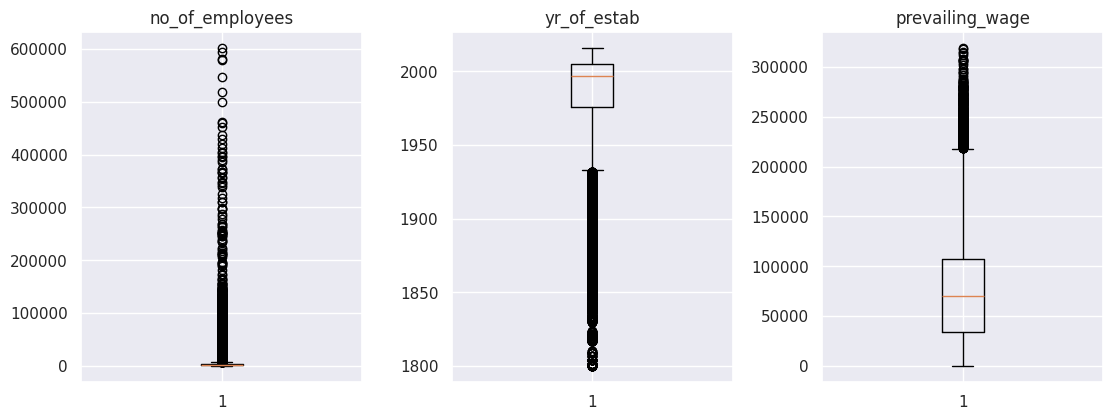

In [ ]:
# outlier detection using boxplot
numeric_columns = dfcopy.select_dtypes(include=np.number).columns.tolist()

categorical_columns = dfcopy.select_dtypes(include=object).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(dfcopy[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()


### Data Preparation for modeling

In [ ]:
dfcopy = dfcopy.select_dtypes(include=['object'])
X = dfcopy.drop(["case_status"], axis=1)
y = dfcopy["case_status"].apply(lambda x: 1 if x == "Certified" else 0)
#dfcopy.describe().T
XVal = dfcopy.drop(["case_status"], axis=1)
YVal = dfcopy["case_status"]        # YVal is our target
XVal = pd.get_dummies(XVal, columns=["unit_of_wage","full_time_position","requires_job_training","has_job_experience","continent","education_of_employee","region_of_employment"],drop_first=True)

# Drop the original categorical columns before converting to int32
original_categorical_cols_XVal = ["unit_of_wage","full_time_position","requires_job_training","has_job_experience","continent","education_of_employee","region_of_employment"]
XVal = XVal.drop(original_categorical_cols_XVal, axis=1, errors='ignore')
XVal = XVal.astype(np.int32)
XVal.describe().T

,count,mean,std,min,25%,50%,75%,max
unit_of_wage_Month,25447.000,0.003,0.059,0.000,0.000,0.000,0.000,1.000
unit_of_wage_Week,25447.000,0.011,0.103,0.000,0.000,0.000,0.000,1.000
unit_of_wage_Year,25447.000,0.901,0.298,0.000,1.000,1.000,1.000,1.000
full_time_position_Y,25447.000,0.894,0.308,0.000,1.000,1.000,1.000,1.000
requires_job_training_Y,25447.000,0.116,0.320,0.000,0.000,0.000,0.000,1.000
has_job_experience_Y,25447.000,0.581,0.493,0.000,0.000,1.000,1.000,1.000
continent_Asia,25447.000,0.662,0.473,0.000,0.000,1.000,1.000,1.000
continent_Europe,25447.000,0.146,0.354,0.000,0.000,0.000,0.000,1.000
continent_North America,25447.000,0.129,0.335,0.000,0.000,0.000,0.000,1.000
continent_Oceania,25447.000,0.008,0.087,0.000,0.000,0.000,0.000,1.000


In [ ]:
YVal.describe().T


,case_status
count,25447
unique,2
top,Certified
freq,17001


## Model Building

### Model Evaluation Criterion

- Choose the primary metric to evaluate the model on
- Elaborate on the rationale behind choosing the metric

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The `model_performance_classification_sklearn` function will be used to check the model performance of models.
* The `confusion_matrix_sklearn` function will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Convert target labels to numerical format if they are strings
    if target.dtype == 'object':
        target = target.apply(lambda x: 1 if x == "Certified" else 0)


    # predicting using the independent variables
    pred = model.predict(predictors)

    # Convert predictions to numerical format if they are strings and target is numerical
    if pred.dtype == 'object' and target.dtype != 'object':
        pred = pd.Series(pred).apply(lambda x: 1 if x == "Certified" else 0)


    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with Original data

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    XVal, YVal, test_size=0.2, random_state=1, stratify=YVal
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print("Shape of X_train:",X_train.shape, "\n Shape of X_val:",X_val.shape,"\n Shape of X_test:", X_test.shape)
print("\n")
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

# y_train.head() # Testing step
print("\n")
print("Number of rows in y-train data =", y_train.shape[0])
print("Number of rows in y-validation data =", y_val.shape[0])
print("Number of rows in y-test data =", y_test.shape[0])

Shape of X_train: (15267, 18) 
 Shape of X_val: (5090, 18) 
 Shape of X_test: (5090, 18)


Number of rows in train data = 15267
Number of rows in validation data = 5090
Number of rows in test data = 5090


Number of rows in y-train data = 15267
Number of rows in y-validation data = 5090
Number of rows in y-test data = 5090


In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train), pos_label='Certified', zero_division=1)
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val), pos_label='Certified', zero_division=1)
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.787528189038141
Random forest: 0.786351603098343
GBM: 0.8694970095107364
Adaboost: 0.8979311697225218
dtree: 0.7752720854985783

Validation Performance:

Bagging: 0.7653631284916201
Random forest: 0.7615407233166716
GBM: 0.86062922669803
Adaboost: 0.8859159070861511
dtree: 0.7536018817994707


### Lets find the Performance Difference between Training and Validation with original data

In [ ]:
print("\n ")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train), pos_label='Certified', zero_division=1)
    scores_val = recall_score(y_val, model.predict(X_val), pos_label='Certified', zero_division=1)
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


 
Bagging: Training Score: 0.7875, Validation Score: 0.7654, Difference: 0.0222
Random forest: Training Score: 0.7864, Validation Score: 0.7615, Difference: 0.0248
GBM: Training Score: 0.8695, Validation Score: 0.8606, Difference: 0.0089
Adaboost: Training Score: 0.8979, Validation Score: 0.8859, Difference: 0.0120
dtree: Training Score: 0.7753, Validation Score: 0.7536, Difference: 0.0217


** Observations **
* GBM has better result with low difference of 0.0089  than Adaboost model with difference of 0.01 using original data, even though adaboost result is good.

### Model Building with Oversampled data

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 0
Before Oversampling, counts of label 'No': 0 

After Oversampling, counts of label 'Yes': 0
After Oversampling, counts of label 'No': 0 

After Oversampling, the shape of train_X: (20398, 18)
After Oversampling, the shape of train_y: (20398,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over), pos_label='Certified', zero_division=1)
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val), pos_label='Certified', zero_division=1)
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.783606235905481
Random forest: 0.7738013530738308
GBM: 0.7480145112265908
Adaboost: 0.7129130306892832
dtree: 0.7860574566133934

Validation Performance:

Bagging: 0.7594825051455454
Random forest: 0.7477212584533961
GBM: 0.7409585416054102
Adaboost: 0.7027344898559247
dtree: 0.7621287856512791


### Lets find the Performance Difference between Training and Validation of over sampled data

In [ ]:
print("\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over),pos_label='Certified', zero_division=1)
    scores_val = recall_score(y_val, model.predict(X_val),pos_label='Certified', zero_division=1)
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, <<<Difference>>> {:.4f}".format(name, scores_train, scores_val, difference2))



Bagging: Training Score: 0.7836, Validation Score: 0.7595, <<<Difference>>> 0.0241
Random forest: Training Score: 0.7738, Validation Score: 0.7477, <<<Difference>>> 0.0261
GBM: Training Score: 0.7480, Validation Score: 0.7410, <<<Difference>>> 0.0071
Adaboost: Training Score: 0.7129, Validation Score: 0.7027, <<<Difference>>> 0.0102
dtree: Training Score: 0.7861, Validation Score: 0.7621, <<<Difference>>> 0.0239


*  GBM shows better result with lowest difference of 0.0071 followed by Adaboost model  0.0102 when data is over sampled.

### Model Building with Undersampled data

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 0
Before Under Sampling, counts of label 'No': 0 

After Under Sampling, counts of label 'Yes': 0
After Under Sampling, counts of label 'No': 0 

After Under Sampling, the shape of train_X: (10136, 18)
After Under Sampling, the shape of train_y: (10136,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un),pos_label='Certified', zero_division=1)
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val), pos_label='Certified', zero_division=1)
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.7829518547750592
Random forest: 0.7853196527229677
GBM: 0.7273086029992107
Adaboost: 0.7261247040252565
dtree: 0.7955801104972375

Validation Performance:

Bagging: 0.7447809467803587
Random forest: 0.7447809467803587
GBM: 0.7174360482211114
Adaboost: 0.7186121728903264
dtree: 0.7580123493090267


### Lets find the Performance Difference between Training and Validation of under sampled Data

In [ ]:
print("\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un),pos_label='Certified', zero_division=1)
    scores_val = recall_score(y_val, model.predict(X_val),pos_label='Certified', zero_division=1)
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference>>> {:.4f}".format(name, scores_train, scores_val, difference3))



Bagging: Training Score: 0.7830, Validation Score: 0.7448, Difference>>> 0.0382
Random forest: Training Score: 0.7853, Validation Score: 0.7448, Difference>>> 0.0405
GBM: Training Score: 0.7273, Validation Score: 0.7174, Difference>>> 0.0099
Adaboost: Training Score: 0.7261, Validation Score: 0.7186, Difference>>> 0.0075
dtree: Training Score: 0.7956, Validation Score: 0.7580, Difference>>> 0.0376


* Adaboost model has better performance with lowest difference of 0.0075 than GBM 0.0099 when tunning with the undersampled data.

## Hyperparameter Tuning

**Best practices for hyperparameter tuning in AdaBoost:**

`n_estimators`:

- Start with a specific number (50 is used in general) and increase in steps: 50, 75, 85, 100

- Use fewer estimators (e.g., 50 to 100) if using complex base learners (like deeper decision trees)

- Use more estimators (e.g., 100 to 150) when learning rate is low (e.g., 0.1 or lower)

- Avoid very high values unless performance keeps improving on validation

`learning_rate`:

- Common values to try: 1.0, 0.5, 0.1, 0.01

- Use 1.0 for faster training, suitable for fewer estimators

- Use 0.1 or 0.01 when using more estimators to improve generalization

- Avoid very small values (< 0.01) unless you plan to use many estimators (e.g., >500) and have sufficient data


---

**Best practices for hyperparameter tuning in Random Forest:**


`n_estimators`:

* Start with a specific number (50 is used in general) and increase in steps: 50, 75, 100, 125
* Higher values generally improve performance but increase training time
* Use 100-150 for large datasets or when variance is high


`min_samples_leaf`:

* Try values like: 1, 2, 4, 5, 10
* Higher values reduce model complexity and help prevent overfitting
* Use 1–2 for low-bias models, higher (like 5 or 10) for more regularized models
* Works well in noisy datasets to smooth predictions


`max_features`:

* Try values: `"sqrt"` (default for classification), `"log2"`, `None`, or float values (e.g., `0.3`, `0.5`)
* `"sqrt"` balances between diversity and performance for classification tasks
* Lower values (e.g., `0.3`) increase tree diversity, reducing overfitting
* Higher values (closer to `1.0`) may capture more interactions but risk overfitting


`max_samples` (for bootstrap sampling):

* Try float values between `0.5` to `1.0` or fixed integers
* Use `0.6–0.9` to introduce randomness and reduce overfitting
* Smaller values increase diversity between trees, improving generalization

---

**Best practices for hyperparameter tuning in Gradient Boosting:**

`n_estimators`:

* Start with 100 (default) and increase: 100, 200, 300, 500
* Typically, higher values lead to better performance, but they also increase training time
* Use 200–500 for larger datasets or complex problems
* Monitor validation performance to avoid overfitting, as too many estimators can degrade generalization


`learning_rate`:

* Common values to try: 0.1, 0.05, 0.01, 0.005
* Use lower values (e.g., 0.01 or 0.005) if you are using many estimators (e.g., > 200)
* Higher learning rates (e.g., 0.1) can be used with fewer estimators for faster convergence
* Always balance the learning rate with `n_estimators` to prevent overfitting or underfitting


`subsample`:

* Common values: 0.7, 0.8, 0.9, 1.0
* Use a value between `0.7` and `0.9` for improved generalization by introducing randomness
* `1.0` uses the full dataset for each boosting round, potentially leading to overfitting
* Reducing `subsample` can help reduce overfitting, especially in smaller datasets


`max_features`:

* Common values: `"sqrt"`, `"log2"`, or float (e.g., `0.3`, `0.5`)
* `"sqrt"` (default) works well for classification tasks
* Lower values (e.g., `0.3`) help reduce overfitting by limiting the number of features considered at each split

---

**Best practices for hyperparameter tuning in XGBoost:**

`n_estimators`:

* Start with 50 and increase in steps: 50,75,100,125.
* Use more estimators (e.g., 150-250) when using lower learning rates
* Monitor validation performance
* High values improve learning but increase training time

`subsample`:

* Common values: 0.5, 0.7, 0.8, 1.0
* Use `0.7–0.9` to introduce randomness and reduce overfitting
* `1.0` uses the full dataset in each boosting round; may overfit on small datasets
* Values < 0.5 are rarely useful unless dataset is very large

`gamma`:

* Try values: 0 (default), 1, 3, 5, 8
* Controls minimum loss reduction needed for a split
* Higher values make the algorithm more conservative (i.e., fewer splits)
* Use values > 0 to regularize and reduce overfitting, especially on noisy data


`colsample_bytree`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled per tree
* Lower values (e.g., 0.3 or 0.5) increase randomness and improve generalization
* Use `1.0` when you want all features considered for every tree


`colsample_bylevel`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled at each tree level (i.e., per split depth)
* Lower values help in regularization and reducing overfitting
* Often used in combination with `colsample_bytree` for fine control over feature sampling

---

**Observation:** Based on the results with over and under sampled data , we will tune GBM Oversampled (the difference of training and validation - 0.007) GBM Undersampled ( the difference of training and validation 0.009) and undersampled Adaboost (the difference of training and validation 0.007).

## Tunning undersampled Adaboost model.

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score,pos_label='Certified', zero_division=1)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1, error_score="raise")

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': np.int64(10), 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.9313336877009137:
CPU times: user 1.11 s, sys: 115 ms, total: 1.23 s
Wall time: 1min 1s


In [ ]:
tuned_adaboost = AdaBoostClassifier(
    random_state=1,
    n_estimators=10,
    learning_rate=0.1,
    estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
tuned_adaboost.fit(X_train_un, y_train_un)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=10, random_state=1)

In [ ]:
# Checking model's performance on train set

adaboost_train_un = model_performance_classification_sklearn(tuned_adaboost, X_train_un, y_train_un)
adaboost_train_un


,Accuracy,Recall,Precision,F1
0,0.674,0.624,0.693,0.657


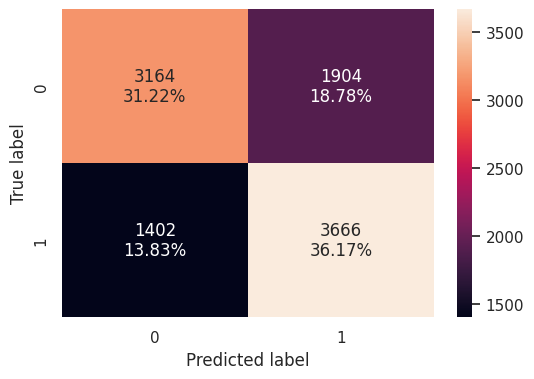

In [ ]:
confusion_matrix_sklearn(tuned_adaboost,X_train_un,y_train_un)

In [ ]:
# Checking model's performance on validation set

adaboost_val_un = model_performance_classification_sklearn(tuned_adaboost, XVal,YVal)
adaboost_val_un

,Accuracy,Recall,Precision,F1
0,0.665,0.635,0.822,0.717


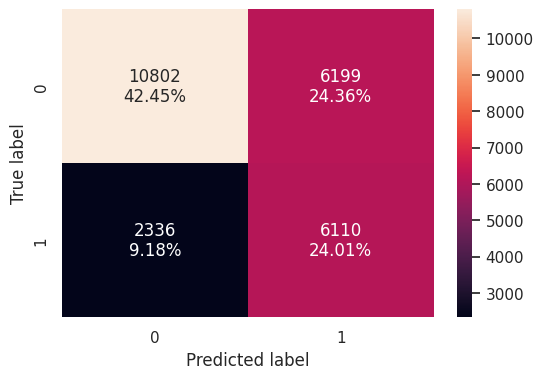

In [ ]:
confusion_matrix_sklearn(tuned_adaboost,XVal,YVal)

** Observation **
* after tuning under sampled adaboost model the recall score didn't show a good result.

## Tunning under sampled GBM

In [ ]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(125,175,25),
    "learning_rate": [0.01, 0.2, 0.05, 1],
    "subsample":[0.8,0.9,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': np.int64(150), 'max_features': 0.5, 'learning_rate': 0.2, 'init': DecisionTreeClassifier(random_state=1)} with CV score=nan:
CPU times: user 2.65 s, sys: 226 ms, total: 2.87 s
Wall time: 2min 56s


In [ ]:
tuned_gbm_un = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=150,
    max_features=0.5,
    learning_rate=0.2,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm_un.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.5,
                           n_estimators=150, random_state=1, subsample=0.9)

In [ ]:
# Checking model's performance on training set
gbm_train_un = model_performance_classification_sklearn(
    tuned_gbm_un, X_train_un, y_train_un
)
gbm_train_un

,Accuracy,Recall,Precision,F1
0,0.714,0.755,0.697,0.725


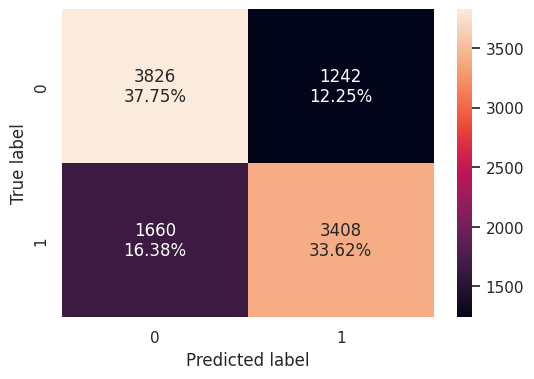

In [ ]:
confusion_matrix_sklearn(tuned_gbm_un,X_train_un,y_train_un)

In [ ]:
# Checking model's performance on validation set
gbm_val_un = model_performance_classification_sklearn(tuned_gbm_un, X_val, y_val)
gbm_val_un

,Accuracy,Recall,Precision,F1
0,0.718,0.740,0.820,0.778


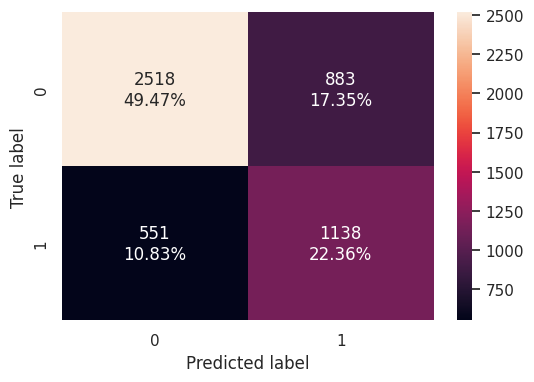

In [ ]:
confusion_matrix_sklearn(tuned_gbm_un,X_val,y_val)

* after tuning under sampled gradient boosting model the recall score didn't show a good result 0.75 (training) and 0.74 ( validation) a difference as 0.015, previously without tuning the differnece of recall between training and validation was 0.009.

## Tunning oversampled GBM

In [ ]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': np.int64(100), 'max_features': 0.7, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=nan:
CPU times: user 3.51 s, sys: 399 ms, total: 3.91 s
Wall time: 3min 24s


In [ ]:
tuned_gbm_over = GradientBoostingClassifier(
    random_state=1,
    subsample=0.5,
    n_estimators=100,
    max_features=0.7,
    learning_rate=0.1,
    init=DecisionTreeClassifier(random_state=1),
)
tuned_gbm_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=DecisionTreeClassifier(random_state=1),
                           max_features=0.7, random_state=1, subsample=0.5)

In [ ]:
# Checking model's performance on training set
gbm_train_over = model_performance_classification_sklearn(tuned_gbm_over, X_train_over, y_train_over)
gbm_train_over

,Accuracy,Recall,Precision,F1
0,0.732,0.780,0.712,0.744


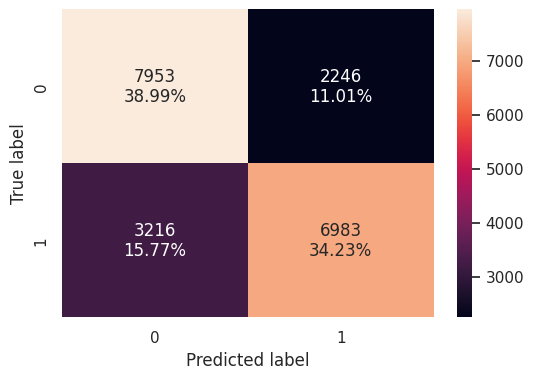

In [ ]:
confusion_matrix_sklearn(tuned_gbm_over,X_train_over,y_train_over)

In [ ]:
# Checking model's performance on validation set
gbm_val_over = model_performance_classification_sklearn(tuned_gbm_over, X_val, y_val)
gbm_val_over

,Accuracy,Recall,Precision,F1
0,0.720,0.755,0.812,0.783


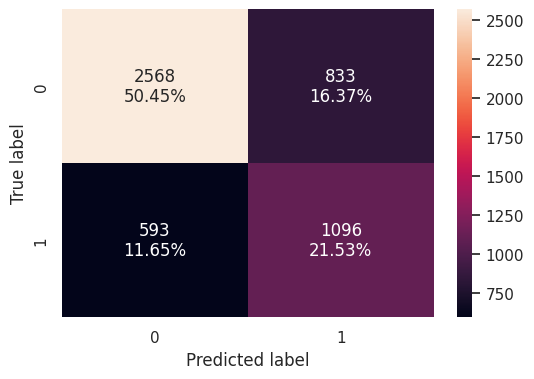

In [ ]:
confusion_matrix_sklearn(tuned_gbm_over,X_val,y_val)

* after tuning over sampled gradient boosting model the recall score showed a good result around 78% (0.78 training ) and (0.75 for validation)

## Model Performance Summary and Final Model Selection

Training Comparision

In [ ]:
models_train_comp_df = pd.concat(
    [
        gbm_train_over.T,
        gbm_train_un.T,
        adaboost_train_un.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Oversampled data",
    "Gradient boosting trained with Undersampled data",
    "AdaBoost trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Oversampled data,Gradient boosting trained with Undersampled data,AdaBoost trained with Undersampled data
Accuracy,0.732,0.714,0.674
Recall,0.780,0.755,0.624
Precision,0.712,0.697,0.693
F1,0.744,0.725,0.657


Validation comparision

In [ ]:
models_train_comp_df = pd.concat(
    [ gbm_val_over.T, gbm_val_un.T, adaboost_val_un.T], axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Oversampled data",
    "Gradient boosting trained with Undersampled data",
    "AdaBoost trained with Undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Gradient boosting trained with Oversampled data,Gradient boosting trained with Undersampled data,AdaBoost trained with Undersampled data
Accuracy,0.720,0.718,0.665
Recall,0.755,0.740,0.635
Precision,0.812,0.820,0.822
F1,0.783,0.778,0.717


* Gradient boosting model trained giving recall value of 0.78 in training data and 0.75 in validation data using over sampled data has generalised performance, so let's consider it as the best model.

In [ ]:
# lets try the performance of Gradient boosting model trained with over sampled data on test data.
GM_test = model_performance_classification_sklearn(tuned_gbm_over, X_test, y_test)
GM_test

,Accuracy,Recall,Precision,F1
0,0.735,0.774,0.819,0.796


* The recall value ~77% which can be considered a good (not excellent) model to predit visa approval.

## Actionable Insights and Recommendations

# Business Insights and Recommendations
* Visa approval is received with prior job experience which the models used as the most important feature.
* The full time position in a company also drives the visa approval
* Generally Asian applicants with bachelors and masters degree apply for visa with great numbers but if applicants with their Doctorate degree apply for visa they can easily get approved.
* Applicants with hourly or monthly wage are more incliend to visa deniel.
* Applicants with high school education are also getting visa rejection.

<font size=6 color='blue'>Power Ahead</font>
___

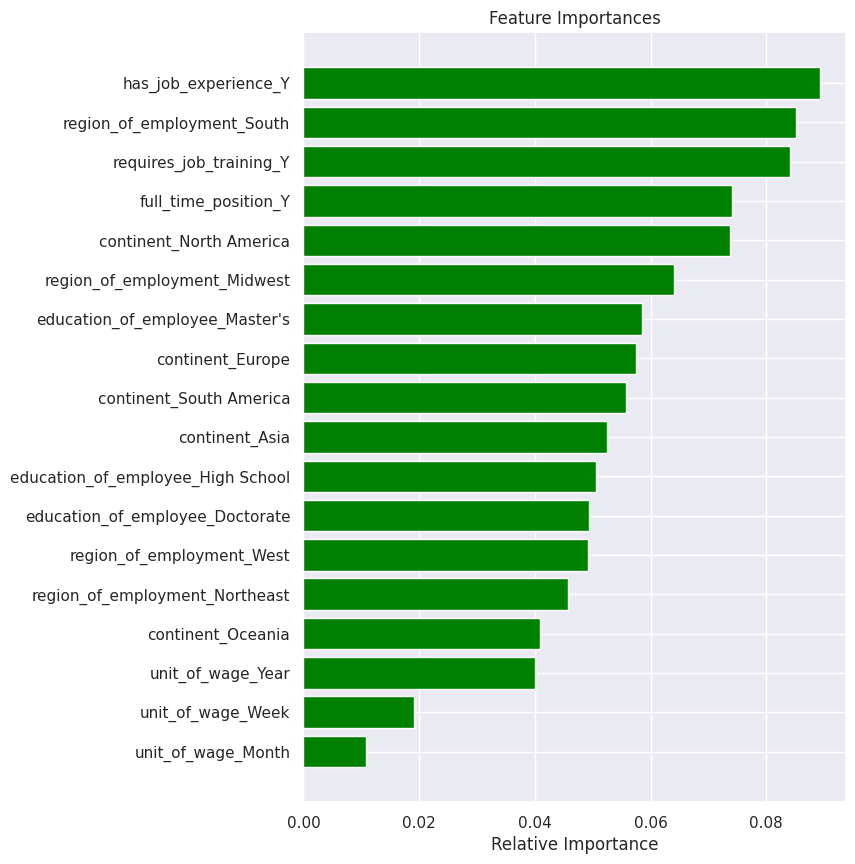

In [ ]:
feature_names = X_train.columns
importances = tuned_gbm_over.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(7, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()